# Dealing with artifacts when plotting contour lines of curvilinear data
Sometimes plotting contourlines of some curvilinear data sets, such as the NASA Team/Bootstrap data, can lead to unwanted artifacts.
Let's assume we loaded the netCDF with xarray and want to plot the 15% SIC contour line for a specific time step.

First, we load some packages and the data set:

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import my_code_base.plot.maps   # for "polar" accessor

In [12]:
da = xr.open_dataset("sic_nasa.nc").sel(time="2021-03-01").siconc

Now, simply plotting the data on the polar-stereographic projection woud produce a weird looking result:

````{margin}
```{seealso}
The features of the map (round shape, ruler, labels, etc.) have been applied via the {meth}`~my_code_base.plot.maps.StereographicAxisAccessor.add_features` method of the {obj}`polar <my_code_base.plot.maps.StereographicAxisAccessor>` accessor.
```
````

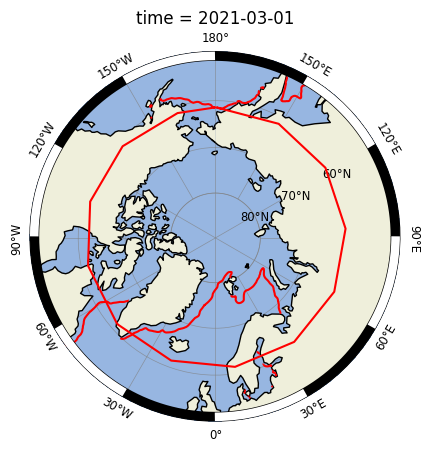

In [11]:
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
da.plot.contour(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), 
                levels=[15], colors=['r'], zorder=10)
ax.polar.add_features()

The contour lines are placed correctly but the polygons are not properly wrapped around the antimeridian.

This problem is discussed and addressed in the following threads:

- https://github.com/SciTools/cartopy/issues/1225
- https://github.com/SciTools/cartopy/issues/1421

The solution is the function `z_masked_overlap` they propose in these threads. Just copy it either from the github site or from here, and apply it to your data.

Here, I wrote a small wrapper function ({obj}`~my_code_base.plot.z_overlap.fix_overlap`) to make it easier to use:

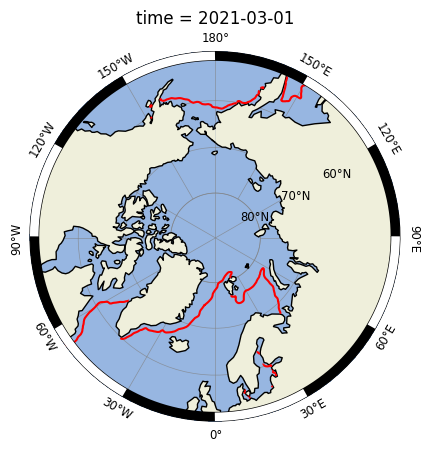

In [8]:
from my_code_base.plot.maps import fix_overlap

ax = plt.subplot(projection=ccrs.NorthPolarStereo())
da = fix_overlap(da, ax)
da.plot.contour(ax=ax, x='lon', y='lat', 
                levels=[15], colors=['r'], zorder=10)
ax.polar.add_features()

Et voilà! 🚀

```{note}
👉 Note that after applying {func}`~my_code_base.plot.z_overlap.fix_overlap` we don't specify the `transform` option in the plot command!
```